# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print(brain)

Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
# Declare agent
import importlib
import agent
import model
importlib.reload(agent)
importlib.reload(model)

GAMMA = 0.99  # discount factor

agent = agent.DiscreteStateAgent(brain.vector_observation_space_size, brain.vector_action_space_size, GAMMA)

Episode 0	Average Score: 0.00
Episode 0	Average Score: 0.00	 Total Score: 0.00
Episode 1	Average Score: -1.00
Episode 2	Average Score: 0.00
Episode 3	Average Score: -1.00
Episode 4	Average Score: 0.00
Episode 5	Average Score: 0.00
Episode 6	Average Score: -1.00
Episode 7	Average Score: 0.00
Episode 8	Average Score: 0.00
Episode 9	Average Score: 0.00
Episode 10	Average Score: 2.00
Episode 11	Average Score: -1.00
Episode 12	Average Score: 2.00
Episode 13	Average Score: 1.00
Episode 14	Average Score: 1.00
Episode 15	Average Score: 2.00
Episode 16	Average Score: 1.00
Episode 17	Average Score: 3.00
Episode 18	Average Score: 1.00
Episode 19	Average Score: -1.00
Episode 20	Average Score: 0.00
Episode 21	Average Score: 3.00
Episode 22	Average Score: 1.00
Episode 23	Average Score: 1.00
Episode 24	Average Score: 1.00
Episode 25	Average Score: 0.00
Episode 26	Average Score: 2.00
Episode 27	Average Score: 3.00
Episode 28	Average Score: 3.00
Episode 29	Average Score: 3.00
Episode 30	Average Score: 

Episode 252	Average Score: 16.00
Episode 253	Average Score: 8.00
Episode 254	Average Score: 11.00
Episode 255	Average Score: 12.00
Episode 256	Average Score: 13.00
Episode 257	Average Score: 7.00
Episode 258	Average Score: 8.00
Episode 259	Average Score: 12.00
Episode 260	Average Score: 15.00
Episode 261	Average Score: 17.00
Episode 262	Average Score: 13.00
Episode 263	Average Score: 15.00
Episode 264	Average Score: 15.00
Episode 265	Average Score: 11.00
Episode 266	Average Score: 12.00
Episode 267	Average Score: 6.00
Episode 268	Average Score: 18.00
Episode 269	Average Score: 12.00
Episode 270	Average Score: 16.00
Episode 271	Average Score: 16.00
Episode 272	Average Score: 13.00
Episode 273	Average Score: 14.00
Episode 274	Average Score: 21.00
Episode 275	Average Score: 15.00
Episode 276	Average Score: 14.00
Episode 277	Average Score: 16.00
Episode 278	Average Score: 13.00
Episode 279	Average Score: 14.00
Episode 280	Average Score: 9.00
Episode 281	Average Score: 11.00
Episode 282	Ave

Episode 498	Average Score: 15.00
Episode 499	Average Score: 10.00
Episode 500	Average Score: 16.00
Episode 500	Average Score: 15.54	 Total Score: 16.00
Episode 501	Average Score: 14.00
Episode 502	Average Score: 15.00
Episode 503	Average Score: 18.00
Episode 504	Average Score: 17.00
Episode 505	Average Score: 21.00
Episode 506	Average Score: 17.00
Episode 507	Average Score: 12.00
Episode 508	Average Score: 13.00
Episode 509	Average Score: 11.00
Episode 510	Average Score: 14.00
Episode 511	Average Score: 14.00
Episode 512	Average Score: 12.00
Episode 513	Average Score: 17.00
Episode 514	Average Score: 3.00
Episode 515	Average Score: 9.00
Episode 516	Average Score: 17.00
Episode 517	Average Score: 23.00
Episode 518	Average Score: 18.00
Episode 519	Average Score: 17.00
Episode 520	Average Score: 14.00
Episode 521	Average Score: 12.00
Episode 522	Average Score: 17.00
Episode 523	Average Score: 17.00
Episode 524	Average Score: 14.00
Episode 525	Average Score: 8.00
Episode 526	Average Score:

Episode 742	Average Score: 16.00
Episode 743	Average Score: 20.00
Episode 744	Average Score: 14.00
Episode 745	Average Score: 20.00
Episode 746	Average Score: 16.00
Episode 747	Average Score: 16.00
Episode 748	Average Score: 14.00
Episode 749	Average Score: 20.00
Episode 750	Average Score: 21.00
Episode 751	Average Score: 14.00
Episode 752	Average Score: 13.00
Episode 753	Average Score: 24.00
Episode 754	Average Score: 15.00
Episode 755	Average Score: 12.00
Episode 756	Average Score: 11.00
Episode 757	Average Score: 14.00
Episode 758	Average Score: 22.00
Episode 759	Average Score: 19.00
Episode 760	Average Score: 14.00
Episode 761	Average Score: 21.00
Episode 762	Average Score: 17.00
Episode 763	Average Score: 17.00
Episode 764	Average Score: 13.00
Episode 765	Average Score: 15.00
Episode 766	Average Score: 17.00
Episode 767	Average Score: 12.00
Episode 768	Average Score: 18.00
Episode 769	Average Score: 19.00
Episode 770	Average Score: 19.00
Episode 771	Average Score: 15.00
Episode 77

Episode 988	Average Score: 19.00
Episode 989	Average Score: 16.00
Episode 990	Average Score: 14.00
Episode 991	Average Score: 14.00
Episode 992	Average Score: 18.00
Episode 993	Average Score: 18.00
Episode 994	Average Score: 17.00
Episode 995	Average Score: 19.00
Episode 996	Average Score: 12.00
Episode 997	Average Score: 15.00
Episode 998	Average Score: 20.00
Episode 999	Average Score: 18.00
Episode 1000	Average Score: 17.00
Episode 1000	Average Score: 15.98	 Total Score: 17.00
Episode 1001	Average Score: 16.00
Episode 1002	Average Score: 11.00
Episode 1003	Average Score: 14.00
Episode 1004	Average Score: 19.00
Episode 1005	Average Score: 19.00
Episode 1006	Average Score: 12.00
Episode 1007	Average Score: 19.00
Episode 1008	Average Score: 10.00
Episode 1009	Average Score: 14.00
Episode 1010	Average Score: 13.00
Episode 1011	Average Score: 18.00
Episode 1012	Average Score: 11.00
Episode 1013	Average Score: 15.00
Episode 1014	Average Score: 16.00
Episode 1015	Average Score: 17.00
Episod

Episode 1225	Average Score: 14.00
Episode 1226	Average Score: 15.00
Episode 1227	Average Score: 22.00
Episode 1228	Average Score: 3.00
Episode 1229	Average Score: 19.00
Episode 1230	Average Score: 18.00
Episode 1231	Average Score: 13.00
Episode 1232	Average Score: 13.00
Episode 1233	Average Score: 19.00
Episode 1234	Average Score: 15.00
Episode 1235	Average Score: 23.00
Episode 1236	Average Score: 20.00
Episode 1237	Average Score: 14.00
Episode 1238	Average Score: 16.00
Episode 1239	Average Score: 20.00
Episode 1240	Average Score: 11.00
Episode 1241	Average Score: 20.00
Episode 1242	Average Score: 21.00
Episode 1243	Average Score: 11.00
Episode 1244	Average Score: 19.00
Episode 1245	Average Score: 14.00
Episode 1246	Average Score: 19.00
Episode 1247	Average Score: 19.00
Episode 1248	Average Score: 17.00
Episode 1249	Average Score: 11.00
Episode 1250	Average Score: 16.00
Episode 1251	Average Score: 17.00
Episode 1252	Average Score: 15.00
Episode 1253	Average Score: 18.00
Episode 1254	Av

Episode 1464	Average Score: 19.00
Episode 1465	Average Score: 24.00
Episode 1466	Average Score: 19.00
Episode 1467	Average Score: 18.00
Episode 1468	Average Score: 18.00
Episode 1469	Average Score: 19.00
Episode 1470	Average Score: 15.00
Episode 1471	Average Score: 14.00
Episode 1472	Average Score: 11.00
Episode 1473	Average Score: 19.00
Episode 1474	Average Score: 15.00
Episode 1475	Average Score: 13.00
Episode 1476	Average Score: 18.00
Episode 1477	Average Score: 15.00
Episode 1478	Average Score: 17.00
Episode 1479	Average Score: 13.00
Episode 1480	Average Score: 6.00
Episode 1481	Average Score: 17.00
Episode 1482	Average Score: 13.00
Episode 1483	Average Score: 18.00
Episode 1484	Average Score: 1.00
Episode 1485	Average Score: 14.00
Episode 1486	Average Score: 17.00
Episode 1487	Average Score: 19.00
Episode 1488	Average Score: 15.00
Episode 1489	Average Score: 16.00
Episode 1490	Average Score: 17.00
Episode 1491	Average Score: 17.00
Episode 1492	Average Score: 9.00
Episode 1493	Aver

Episode 1701	Average Score: 14.00
Episode 1702	Average Score: 16.00
Episode 1703	Average Score: 23.00
Episode 1704	Average Score: 12.00
Episode 1705	Average Score: 14.00
Episode 1706	Average Score: 15.00
Episode 1707	Average Score: 18.00
Episode 1708	Average Score: 21.00
Episode 1709	Average Score: 16.00
Episode 1710	Average Score: 20.00
Episode 1711	Average Score: 21.00
Episode 1712	Average Score: 19.00
Episode 1713	Average Score: 14.00
Episode 1714	Average Score: 18.00
Episode 1715	Average Score: 23.00
Episode 1716	Average Score: 14.00
Episode 1717	Average Score: 17.00
Episode 1718	Average Score: 17.00
Episode 1719	Average Score: 21.00
Episode 1720	Average Score: 13.00
Episode 1721	Average Score: 16.00
Episode 1722	Average Score: 16.00
Episode 1723	Average Score: 12.00
Episode 1724	Average Score: 18.00
Episode 1725	Average Score: 16.00
Episode 1726	Average Score: 15.00
Episode 1727	Average Score: 20.00
Episode 1728	Average Score: 14.00
Episode 1729	Average Score: 13.00
Episode 1730	A

Episode 1939	Average Score: 19.00
Episode 1940	Average Score: 13.00
Episode 1941	Average Score: 12.00
Episode 1942	Average Score: 16.00
Episode 1943	Average Score: 11.00
Episode 1944	Average Score: 14.00
Episode 1945	Average Score: 20.00
Episode 1946	Average Score: 15.00
Episode 1947	Average Score: 20.00
Episode 1948	Average Score: 13.00
Episode 1949	Average Score: 9.00
Episode 1950	Average Score: 12.00
Episode 1951	Average Score: 19.00
Episode 1952	Average Score: 18.00
Episode 1953	Average Score: 9.00
Episode 1954	Average Score: 19.00
Episode 1955	Average Score: 19.00
Episode 1956	Average Score: 17.00
Episode 1957	Average Score: 15.00
Episode 1958	Average Score: 18.00
Episode 1959	Average Score: 14.00
Episode 1960	Average Score: 15.00
Episode 1961	Average Score: 10.00
Episode 1962	Average Score: 12.00
Episode 1963	Average Score: 14.00
Episode 1964	Average Score: 12.00
Episode 1965	Average Score: 22.00
Episode 1966	Average Score: 22.00
Episode 1967	Average Score: 20.00
Episode 1968	Ave

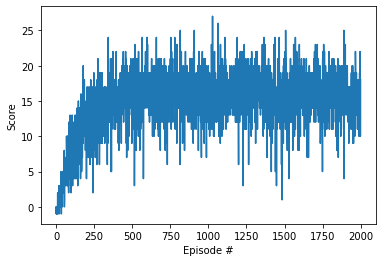

In [11]:
# Function to train the network
from collections import deque
import torch
import matplotlib.pyplot as plt

def train(agent, env, n_episodes=2000, max_t=2000, eps_start=1.0, eps_end=0.01, eps_decay=0.99):

    all_rewards = []
    rewards_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start
    for i_episode in range(n_episodes):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        total_reward = 0
        eps = max(eps_end, eps * eps_decay)
        for t in range(max_t):
            # get action from the agent based on the curernt states
            action = agent.act(state, eps)
            # update the env based on the action
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            # update the agent
            agent.step(state, action, reward, next_state, done)
            # update for the next iteration
            state = next_state
            total_reward += reward
            # the episode reachs the end, so need to start a new episode
            if done:
                break
        all_rewards.append(total_reward)
        rewards_window.append(total_reward)
#         print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(total_reward)), end="")
        print('Episode {}\tAverage Score: {:.2f}\n'.format(i_episode, np.mean(total_reward)), end="")
        if i_episode % 100 == 0:
#             print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            print('Episode {}\tAverage Score: {:.2f}\t Total Score: {:.2f}'.format(i_episode, np.mean(rewards_window), np.mean(total_reward)))
        if np.mean(rewards_window)>=40.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(rewards_window)))
            break
    
    return all_rewards
            

scores = train(agent, env, 2000, 1000)

torch.save(agent.network_local.state_dict(), 'checkpoint_max_t_2000.pth')
# plot the score distribution
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [1]:
from unityagents import UnityEnvironment
import importlib
import agent
import model
import torch
importlib.reload(agent)
importlib.reload(model)

env = UnityEnvironment(file_name="Banana.app")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

agent = agent.DiscreteStateAgent(brain.vector_observation_space_size, brain.vector_action_space_size, 0.99)
agent.network_local.load_state_dict(torch.load('checkpoint.pth'))

# test the model
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state)
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
env.close()
print("Score: {}".format(score))

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Score: 16.0


### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [33]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [0.         0.         1.         0.         0.07196155 0.
 0.         1.         0.         0.04892623 0.         1.
 0.         0.         0.71655846 1.         0.         0.
 0.         0.34762207 1.         0.         0.         0.
 0.34166035 0.         0.         1.         0.         0.0420079
 0.         0.         1.         0.         0.21867581 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```